####  Importing the required dependencies

In [1]:
import numpy as np                                         #for numerical processing
import pandas as pd                                        #for handling datasets
import seaborn as sms                                      #for plotting the graphs
from sklearn.model_selection import train_test_split       #for splitting the dataset into training and testing dataset
from sklearn import svm                                    #for importing the model
from sklearn.metrics import accuracy_score                 #to check the acurracy of model


####  Data collection and processing

In [2]:
#Loading the dataset to pandas dataframe

loan_dataset=pd.read_csv("train_machine.csv")

In [3]:
#Displaying the whole dataset

loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Checking the type of variable loan_dataset(It is not the part of our project)

type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
#Printing first 5 rows from the dataset

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Printing the last 5 rows of dataset

loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#Number of rows and columns in dataset

loan_dataset.shape

(614, 13)

In [8]:
#Stastical Measures

loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#Count the number of missing values in all coloumns(Checking for null values)

loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#filiing null values using mode 

loan_dataset.Credit_History = loan_dataset.Credit_History.fillna(loan_dataset.Credit_History.mode()[0])

In [16]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Dropping the missing values from dataset

loan_dataset=loan_dataset.dropna()

In [18]:
# after dropping checking again the misssing values in the dataset 

loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#After removing missing values the shape of data

loan_dataset.shape

(523, 13)

In [20]:
#Label encoding

loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
#After label encoding of column Loan_Status

loan_dataset.Loan_Status

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 523, dtype: int64

In [22]:
#Dependent coloumn values(Checking the different string values in coloumn dependents)

loan_dataset["Dependents"].value_counts()

0     299
2      91
1      90
3+     43
Name: Dependents, dtype: int64

In [23]:
#Replacing the value of 3+ to 4 in dependents colomn

loan_dataset=loan_dataset.replace(to_replace='3+',value=4)

In [24]:
loan_dataset['Dependents'].value_counts()

0    299
2     91
1     90
4     43
Name: Dependents, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

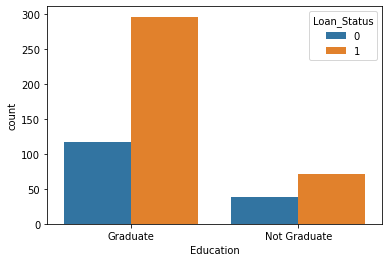

In [25]:
#Visualizing the Eduacation and loan status colomns

sms.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

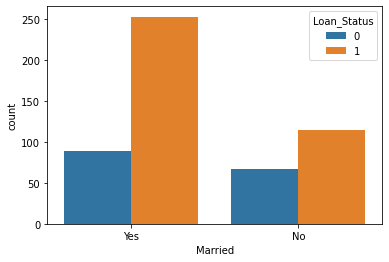

In [26]:
#Married and Loan_status
 
sms.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

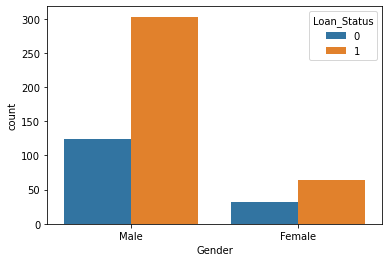

In [27]:
# gender and Loan Status

sms.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

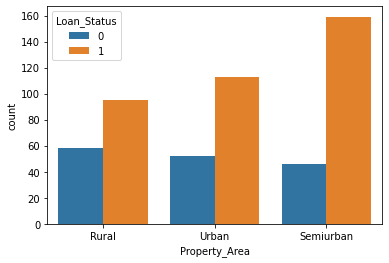

In [28]:
# Property Area and loan status

sms.countplot(x='Property_Area',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

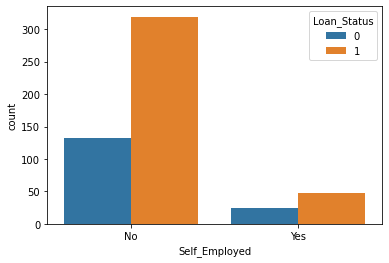

In [29]:
# Self Employed and loan status

sms.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

In [32]:
#Label Encoding

loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [33]:
#Seperating the data and label and unusable column loan_id

X = loan_dataset.drop(columns=['Loan_Status','Loan_ID','Gender'],axis=1)
Y = loan_dataset.Loan_Status

In [34]:
print(X)
print(Y)

     Married Dependents  Education  Self_Employed  ApplicantIncome  \
1          1          1          1              0             4583   
2          1          0          1              1             3000   
3          1          0          0              0             2583   
4          0          0          1              0             6000   
5          1          2          1              1             5417   
..       ...        ...        ...            ...              ...   
609        0          0          1              0             2900   
610        1          4          1              0             4106   
611        1          1          1              0             8072   
612        1          2          1              0             7583   
613        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2              

### Train Test Split

In [36]:
#Splitting the data into training and testing data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [37]:
print(X.shape,x_train.shape,x_test.shape)

(523, 10) (418, 10) (105, 10)


### Training the Model using SVM

In [38]:
#Importing the model into variable classifier

classifier=svm.SVC(kernel='linear')

In [39]:
# Training the svm model

classifier.fit(x_train,y_train)

SVC(kernel='linear')

### Saving our Model into pickle string

In [51]:
#Importing the pickle package

import pickle

In [52]:
#Storing our model into svmp file 

pickle.dump(classifier, open("svmp1.pkl", "wb"))

### Model Evaluation

In [46]:
#Importing our saved model from svmp.pkl file

model= pickle.load(open('svmp.pkl','rb'))

In [47]:
#accuracy score for training data

x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [48]:
print(training_data_accuracy)

0.7655502392344498


In [49]:
# accuracy score for testing data

x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [50]:
print(testing_data_accuracy)

0.7904761904761904


### Not the part of project

In [36]:
x_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [44]:
y_test

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64

In [37]:
df1=pd.read_csv("test_machine.csv")

In [38]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
df1=df1.drop(columns="Loan_ID")

In [40]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [41]:
df1.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [42]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3+,0,1.0,4009,1777,113.0,360.0,1.0,2
363,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.0,2
364,1.0,0,0,1,0.0,3250,1993,126.0,360.0,NaN,1
365,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.0,0


In [43]:
df1=df1.replace(to_replace='3+',value=4)

In [44]:
df1=df1.dropna()

In [45]:
result=classifier.predict(df1)

In [46]:
result

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

### Training the Model using Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
Model=LogisticRegression()

In [53]:
Model.fit(x_train,y_train)

LogisticRegression()

In [60]:
pickle.dump(Model,open("lrp.pkl","wb"))

In [56]:
x_train_prediction=Model.predict(x_train)
training_accuracy=accuracy_score(x_train_prediction,y_train)

In [57]:
training_accuracy

0.8009259259259259

In [58]:
x_test_prediction=Model.predict(x_test)
testing_accuracy=accuracy_score(x_test_prediction,y_test)

In [59]:
testing_accuracy

0.8333333333333334

In [2]:
import pickle

In [3]:
model = pickle.load(open('svmp.pkl','rb'))

In [4]:
import numpy as np

In [53]:
data = [0,0,1,1,4583,0,133,360,0,1]

In [54]:
data1 = np.array(data)

In [56]:
classifier.predict([data1])

array([0], dtype=int64)

In [59]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
h=(x_max/x_min)/100
xx,yy = np.meshgrid(np.arrange(x_min,x_max,h),np.arrange(y_min,y_max,h))

TypeError: '(slice(None, None, None), 0)' is an invalid key